In [34]:
from scipy.io import mmread
import pandas as pd
import matplotlib.pyplot as plt
import umap
import anndata, scanpy
import numpy as np 

## chromVAR

In [3]:
scATAC = pd.read_csv("./motif_dev_z.csv", sep = ",", index_col=0).T
scATAC

,AAACGAACAAACCCTA-1,AAACGAAGTGCTTTGA-1,AAACGAATCTATTGTC-1,AAACTCGAGACTCGGA-1,AAACTCGAGCCTGGTC-1,AAACTCGAGGGAAATG-1,AAACTCGAGGGAGTTC-1,AAACTCGGTCACAGTT-1,AAACTCGTCCGAGAGA-1,AAACTGCAGGGTATCG-1,...,TTTGGCCAGTGGTGTG-1,TTTGGCCGTGTCGTGC-1,TTTGGCCTCTCGGCGA-1,TTTGGTTAGACGCCAA-1,TTTGGTTTCTCTATCA-1,TTTGTGTAGGGTTCTT-1,TTTGTGTAGTTCAACC-1,TTTGTGTCAATAGTGA-1,TTTGTGTCACAGCCAC-1,TTTGTGTCATCCATAG-1
MA0004.1_Arnt,0.967913,-1.182996,-0.008618,-1.910311,-1.125963,-0.287403,1.250237,-0.457761,-0.427468,-1.291691,...,-1.847542,-0.563551,-0.053975,-1.562877,0.748018,0.944248,0.477122,-1.241250,0.170463,-1.709821
MA0006.1_Ahr::Arnt,3.724625,-0.202287,-0.905134,-0.174959,0.218205,0.518168,-1.518842,-0.042327,1.613470,-1.962408,...,1.325922,0.774440,1.523824,-0.813650,-0.694983,1.197895,-0.735669,-0.829157,-1.847286,-0.133870
MA0029.1_Mecom,-0.057142,-0.387338,1.494788,-2.071957,-1.194522,1.986536,-0.472530,-2.432697,-2.824244,0.197926,...,0.986237,0.411073,1.586072,-0.215246,0.256353,-0.003328,-0.027640,0.878313,-1.768262,-0.942798
MA0063.1_Nkx2-5,5.147655,0.907466,-0.923620,-2.154826,-0.572843,-1.467817,-1.611000,1.325348,-0.079179,-1.869052,...,6.044015,-0.253652,0.042590,-0.180600,0.547281,1.416935,-0.722684,0.179622,-1.729873,-1.678377
MA0067.1_Pax2,0.727075,0.069955,-2.268625,2.147321,2.985167,-0.232692,0.922039,0.359993,-1.292033,0.223744,...,0.590308,-0.103938,1.187281,0.660672,-1.942032,0.713649,-0.173773,1.698258,1.287686,-0.299154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MA0904.1_Hoxb5,3.221200,-0.924751,-1.392290,-0.234428,0.695022,-1.696127,-1.964480,0.521920,-1.092070,-0.614061,...,4.528836,-2.155035,0.444469,-0.310762,-0.243099,-1.581984,0.109081,0.154347,-2.344241,-0.936661
MA0910.1_Hoxd8,3.060630,0.306877,-1.167905,-0.612101,0.541906,-0.940553,0.355646,-0.201373,-0.974513,-1.026376,...,5.656870,-1.295885,-1.516877,-0.765294,-0.256764,1.269482,-1.947252,-1.392216,-2.324347,-2.858807
MA0911.1_Hoxa11,0.441553,0.020021,-0.242615,1.141560,1.211694,-1.777667,-0.525138,1.853307,1.649923,-0.771467,...,1.091560,1.578461,-0.574830,1.893428,0.543387,2.712955,-0.749217,-0.319703,0.466821,0.991816
MA0912.1_Hoxd3,2.242676,0.537679,-0.171810,-0.639950,0.602780,-1.858624,-1.704610,-0.284848,0.468452,-1.439286,...,6.201363,-1.198426,0.782676,0.319897,-0.194334,0.212594,-0.374517,0.920677,-2.750882,-1.308652


In [5]:
umap_op = umap.UMAP(n_components=2)
x_umap = umap_op.fit_transform(scATAC.values)

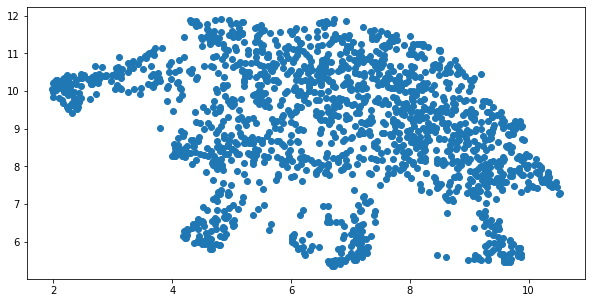

In [8]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot()
ax.scatter(x_umap[:,0], x_umap[:,1])

## scRNA-Seq

In [27]:
cell_anno = pd.read_csv(filepath_or_buffer = "./GSE137116_cell_annotation.csv", index_col = 0)
gene_anno = pd.read_csv(filepath_or_buffer = "./GSE137116_gene_annotation.csv", index_col = 0)
X = (mmread("./GSE137116_gene_by_cell_count_matrix.txt"))
X = X.todense().T
RNA_df = pd.DataFrame(X, index = [x for x in cell_anno.index], columns = [x for x in gene_anno.index])

In [35]:
np.unique(cell_anno.loc[:,"Dataset"].values)

array(['E10.5_CD44+_E+HE+IAC (scATAC paired scRNA)', 'E10.5_CD45+IAC',
       'E10.5_DA_E+HE+IAC', 'E10.5_E+HE+IAC', 'E10.5_E+HE+IAC_cR1_CreNeg',
       'E10.5_E+HE+IAC_cR1_CrePos', 'E10.5_E_01', 'E10.5_E_02',
       'E10.5_HE', 'E10.5_IAC', 'E10.5_Runx1+/+_E+HE+IAC_01',
       'E10.5_Runx1+/+_E+HE+IAC_02', 'E10.5_Runx1+/-_E+HE+IAC_01',
       'E10.5_Runx1+/-_E+HE+IAC_02', 'E10.5_VU_E+HE+IAC',
       'E11.5_CD45+CD27+IAC', 'E11.5_FL_LMPP', 'E11.5_IAC_01',
       'E11.5_IAC_02', 'E14.5_FL_HSC', 'E9.5_E+HE+IAC', 'E9.5_EMP',
       'E9.5_E_01', 'E9.5_E_02', 'E9.5_HE_01', 'E9.5_HE_02'], dtype=object)

In [56]:
# subset only the relevent part of the data
idx = np.where(cell_anno.loc[:,"Dataset"] == 'E10.5_CD44+_E+HE+IAC (scATAC paired scRNA)')[0]
adata = anndata.AnnData(X = RNA_df.iloc[idx,:], obs = cell_anno.iloc[idx,:], var=gene_anno)

In [58]:
scanpy.pp.filter_genes(adata, min_counts=100)
scanpy.pp.normalize_per_cell(adata)
scanpy.pp.log1p(adata)
scanpy.pp.highly_variable_genes(adata, n_top_genes = 500)
adata = adata[:,adata.var.loc[:,"highly_variable"] == True]
adata.write_h5ad("scRNA.h5ad")

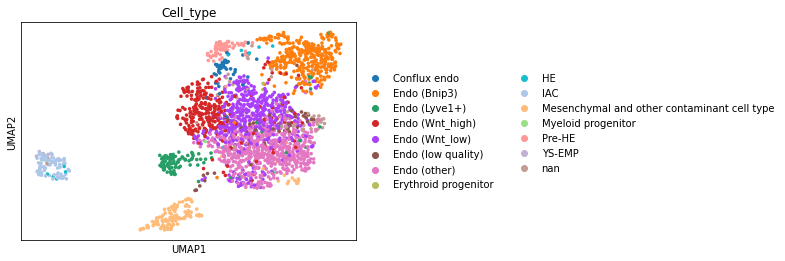

In [72]:
scanpy.pp.neighbors(adata)
scanpy.tl.umap(adata)
scanpy.pl.umap(adata, color="Cell_type")